======================== Import Packages ==========================

In [8]:
import sys, os, pdb, glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits

===================== Define Functions ===================

In [9]:
def readfits(file):

    """
    PURPOSE:    Read in FITS file and header info
    INPUT:      file = path to FITS file (str)
    OUTPUT:     data = image data (2x2 float arr)

    """

    hdulist = fits.open(file)
    data = hdulist[0].data
    hdulist.close()
    
    return(data)

In [10]:
def crop_img(img, width_pix):

    """
    PURPOSE:    Crop image to size for plotting

    INPUT:      img = image to plot (2x2 float array)
                width_pix = width to crop to in pixel units (int)

    OUTPUT:     Cropped image (2x2 float array)

    """

    xcen,ycen = int(img.shape[0]/2),int(img.shape[1]/2)
    img_crop = img[ycen-width_pix:ycen+width_pix,xcen-width_pix:xcen+width_pix]
    
    return img_crop

In [11]:
def plotgas(file):

    """
    PURPOSE:    Plot stacked images

    INPUT:      file = path to file for plotting (str)

    OUTPUT:     None

    """

    img = readfits(file)
    img = crop_img(img, width_pix)

    if file == '../output/stack_nd_13CO_1.fits':
        ax = fig.add_subplot(222)
        ax.set_title(r'$\mathregular{^{13}\!\hspace{0.1}CO}$' + ' & ' + r'$\mathregular{C^{18}\!\hspace{0.1}O}$' + ' Non-detections',
                      y=1.05, fontsize=14, fontweight="bold", fontstyle='italic')
        vmin,vmax = -15, 50
        cbarlabel = r'$\mathregular{F}$' + ' (mJy/beam km/s)'
        clabels = np.arange(vmin, vmax + 1,10)
        ax.text(-1.1, -1.1, r'$\mathregular{^{13}\!\hspace{0.1}CO}$', fontsize=13, fontweight='medium', color='white')
        ax.set_ylabel(r'$\Delta\delta$' + ' (' + r'$^{\prime\prime}$'+')', fontsize=12)
        ax.tick_params(labelbottom=False)

    if file == '../output/stack_nd_C18O_1.fits':
        ax = fig.add_subplot(224)
        vmin,vmax = -15, 50
        cbarlabel = r'$\mathregular{F}$' + ' (mJy/beam km/s)'
        clabels = np.arange(vmin, vmax + 1, 10)
        ax.text(-1.1, -1.1, r'$\mathregular{C^{18}\!\hspace{0.1}O}$', fontsize=13, fontweight='medium', color='white')
        ax.set_xlabel(r'$\Delta\alpha$' + ' ('+r'$^{\prime\prime}$' + ')', fontsize=12, labelpad=2)
        ax.set_ylabel(r'$\Delta\delta$' + ' ('+r'$^{\prime\prime}$' + ')', fontsize=12)
        
    if file == '../output/stack_nd_13CO_2.fits':
        ax = fig.add_subplot(221)
        ax.set_title(r'$\mathregular{C^{18}\!\hspace{0.1}O}$' + ' Non-detections', y=1.05,
                     fontsize=14, fontweight="bold", fontstyle='italic')
        vmin,vmax = -20, 130
        cbarlabel = r'$\mathregular{F}$' + ' (mJy/beam km/s)'
        clabels = np.arange(vmin, vmax + 1, 20)
        ax.text(-1.1, -1.1, r'$\mathregular{^{13}\!\hspace{0.1}CO}$', fontsize=13, fontweight='medium', color='white')
        ax.tick_params(labelbottom=False)
        ax.set_ylabel(r'$\Delta\delta$' + ' ('+r'$^{\prime\prime}$' + ')', fontsize=12)

    if file == '../output/stack_nd_C18O_2.fits':
        ax = fig.add_subplot(223)
        vmin,vmax = -15, 70
        cbarlabel = r'$\mathregular{F}$' + ' (mJy/beam km/s)'
        clabels = np.arange(vmin, vmax + 1, 10)
        ax.text(-1.1, -1.1, r'$\mathregular{C^{18}\!\hspace{0.1}O}$', fontsize=13, fontweight='medium', color='white')
        ax.set_xlabel(r'$\Delta\alpha$' + ' ('+r'$^{\prime\prime}$' + ')', fontsize=12, labelpad=2)
        ax.set_ylabel(r'$\Delta\delta$' + ' ('+r'$^{\prime\prime}$' + ')', fontsize=12)

    test = ax.imshow(img, extent=[-1.0 * width_as,1.0 * width_as, -1.0 * width_as, 1.0 * width_as],
                     interpolation='none', cmap='gnuplot2',vmin=vmin, vmax=vmax, origin='lower')
    
    ax.contour(img, levels=[3.0 * np.std(img), 5.0 * np.std(img)], colors='black',
               extent=[-1.0 * width_as, 1.0 * width_as, -1.0 * width_as, 1.0 * width_as])
    
    cbar = plt.colorbar(test)
    cbar.ax.tick_params(labelsize=9, labelright=True)
    cbar.ax.set_ylabel(cbarlabel, fontsize=11, rotation=270, labelpad=20)
    cbar.set_ticks(clabels)
    cbar.set_ticklabels(clabels)

========================== Code ==========================

In [12]:
### SET UP PLOT
width_pix = 50
width_as  = 50 * 0.03
mpl.rc('xtick', labelsize=9) 
mpl.rc('ytick', labelsize=9)
mpl.rc('xtick.major', size=3, pad=5, width=1)
mpl.rc('ytick.major', size=3, pad=5, width=1)
mpl.rc('axes', linewidth=1)
mpl.rc('lines', markersize=5)
fig = plt.figure(figsize = (12, 7))

<Figure size 1200x700 with 0 Axes>

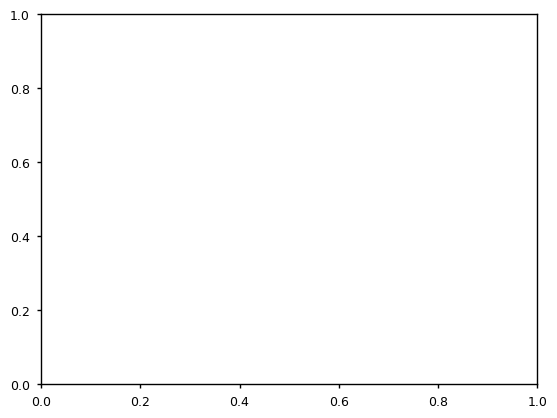

In [13]:
### PLOT STACKS
plotgas('../output/stack_nd_13CO_1.fits')
plotgas('../output/stack_nd_13CO_2.fits')
plotgas('../output/stack_nd_C18O_1.fits')
plotgas('../output/stack_nd_C18O_2.fits')

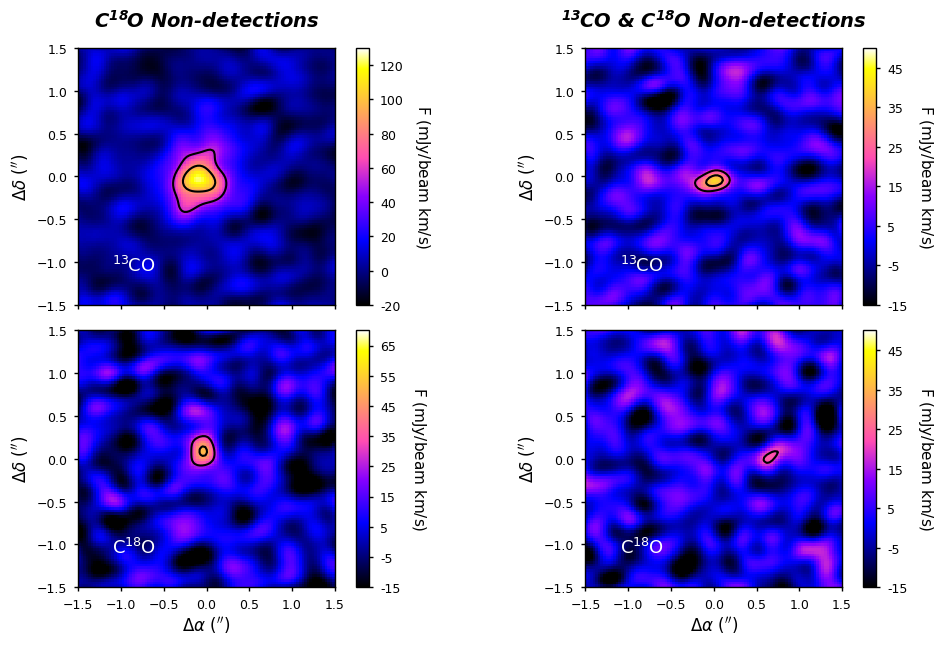

In [14]:
### SAVE PLOT
fig.subplots_adjust(hspace=0.1)
fig.savefig('../output/figure_05.png', bbox_inches='tight', dpi=100)
fig

In [15]:
plt.close('all')